# Car accidents in the US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show matplotlib's plots in Jupyter notebook
%matplotlib inline

In [2]:
accidents = pd.read_csv('US_Accidents_June20.csv')
# parse_dates=['Start_Time', 'End_Time', 'Weather_Timestamp']

In [3]:
accidents.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
accidents.info()
# size: 1008.6+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

# Duplicate values

In [5]:
accidents = accidents.drop_duplicates(subset=['Zipcode', 'Start_Time', 'End_Time'], keep='first')

# originele dataframe 3.513.617 rijen
# met deze dropped rijen 3.454.567 rows 

# Data types
check:
- [X] unieke values of ook rare waarden
- [X] missing values
 
33 - Bump                  - bool  - Schoon, alleen True en False\
34 - Crossing              - bool  - Schoon, alleen True en False\
35 - Give_Way              - bool  - Schoon, alleen True en False\
36 - Junction              - bool  - Schoon, alleen True en False\
37 - No_Exit               - bool  - Schoon, alleen True en False\
38 - Railway               - bool  - Schoon, alleen True en False\
39 - Roundabout            - bool  - Schoon, alleen True en False\
40 - Station               - bool  - Schoon, alleen True en False\
41 - Stop                  - bool  - Schoon, alleen True en False\
42 - Traffic_Calming       - bool  - Schoon, alleen True en False\
43 - Traffic_Signal        - bool  - Schoon, alleen True en False\
44 - Turning_Loop          - bool  - Alleen False --> verwijder variabele\
45 - Sunrise_Sunset        - object  - Night, Day, nan\
46 - Civil_Twilight        - object  - Night, Day, nan\
47 - Nautical_Twilight     - object  - Night, Day, nan\
48 - Astronomical_Twilight - object  - Night, Day, nan

In [6]:
#accidents_df['Severity'].unique()

In [7]:
# Change Severity to a category datatype.
#accidents['Severity'] = accidents['Severity'].astype('category')

#### Difference start time and end time

In [8]:
# Change Start_Time and End_Time to date-time variables
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'])
accidents['Weather_Timestamp'] = pd.to_datetime(accidents['Weather_Timestamp'])

In [9]:
# Create a new variable that measures total time of the accident. 
total_time = accidents['End_Time'] - accidents['Start_Time']

accidents.insert(loc=6, column='Total_Time', value=total_time)

In [10]:
#min(total_time)
#   '-1 days +23:25:55'
#max(total_time)
#   '987 days 11:15:29'


#accidents[accidents['Total_Time']>'30 days'].head()
#   22 rows waarbij de total time minder dan 0 is. 
#   Severity 2 en 3. 

#   326 rows waarbij de total time groter dan 30 dagen is.
#   Severity 2-3-4 (1 niet zichtbaar maar mogelijk wel erin).

In [11]:
# Drop all 22 rows where total time is less than 0
accidents = accidents[accidents['Total_Time']>'0']

In [12]:
# Create a new variable that changes total time of the accident to hours
my_list=[]

for obj in accidents['Total_Time']:
    my_list.append(int((obj.total_seconds())/60/60))  #Take the seconds of the deltatime object, then /60/60 to get hours
                
        
my_list

# Save as a new column in the data frame
#accidents.insert(loc=7, column='Total_Time_H', value=pd.Series(my_list))
accidents['Total_Time_H'] = my_list

In [13]:
accidents['Total_Time_H'].describe()

count    3.454545e+06
mean     1.304805e+00
std      4.694197e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.369900e+04
Name: Total_Time_H, dtype: float64

In [14]:
accidents['Total_Time_H'].isnull().sum()

0

#### Year of the accident

In [15]:
# Create a new variable for the year of the accidents (based off start year)
my_list=[]
for obj in accidents['Start_Time']:
    my_list.append(obj.year)
my_list

accidents.insert(loc=8, column='Year', value=my_list)

#### Month of the accident

In [16]:
# Create a new variable for the year of the accidents (based off start year)
my_list=[]
for obj in accidents['Start_Time']:
    my_list.append(obj.month)
my_list

accidents.insert(loc=8, column='Month', value=my_list)

In [17]:
accidents['Month'] = accidents['Month'].astype('category')

#### Hour of the day of the accident (based on Start_Time)

In [18]:
# Create a new variable for the year of the accidents (based off start year)
my_list=[]
for obj in accidents['Start_Time']:
    my_list.append(obj.hour)
my_list

accidents.insert(loc=8, column='Hour', value=my_list)

In [19]:
# Create a new variable for the year of the accidents (based off start year)
#my_list=[]
#for obj in accidents['Start_Time']:
#    new = obj.strftime(format='%H:%M')
#    my_list.append(new)
#my_list

#accidents.insert(loc=8, column='Time', value=my_list)

#### Day of the week

In [20]:
# Create a new variable for the day of the week of the accident. The day of the week with Monday=0, Sunday=6.
weekday = accidents['Start_Time'].dt.weekday

# turn the weekday into strings instead of integers
my_list = []

for day in weekday:
    if day == 0:
        my_list.append('monday')
    elif day == 1:
        my_list.append('tuesday')
    elif day == 2:
        my_list.append('wednesday')
    elif day == 3:
        my_list.append('thursday')
    elif day == 4:
        my_list.append('friday')
    elif day == 5:
        my_list.append('saturday')
    elif day == 6:
        my_list.append('sunday')

weekday = pd.Series(my_list)

accidents.insert(loc=9, column='Weekday', value=weekday)

In [21]:
accidents['Weekday'] = accidents['Weekday'].astype('category')

#### Season of the accident

In [22]:
# get season from the dates. Months 1-3 are winter, 4-6 are spring, etc.
my_list=[]

for date in accidents['Start_Time']:
    if date.month <= 3:
        season = 'winter'
    elif (date.month >= 4) & (date.month <= 6):
        season = 'spring'
    elif (date.month >= 7) & (date.month <= 9):
        season = 'summer'
    elif (date.month >= 10) & (date.month <= 12):
        season = 'fall'
    else:
        season = 'nothing???'
    my_list.append(season)

season = pd.Series(my_list)
#season.value_counts()

accidents.insert(loc=10, column='Season', value=season)

#### Create a new value for the sunset_sunrise: dusk/twilight
Create a new value for dusk/twilight using the other light columns. Vision is limited during twilight compared to during the day, but vision is better than during the night. 

In [23]:
light = []
error = 0

for i, value in accidents['Sunrise_Sunset'].items():
    if value == 'Day':
        light.append('Day')
    elif value == 'Night':
        if accidents['Astronomical_Twilight'].loc[i] == 'Day':
            light.append('Twilight')
        elif accidents['Astronomical_Twilight'].loc[i] == 'Night':
            light.append('Night')
    else:
        error += 1
        light.append(float('NaN'))
        # during nan values? count number of errors 
        
# Create a new variable in 'accidents' dataframe
accidents['Light'] = light

In [114]:
error
accidents['Light'].isna().sum()

109

In [24]:
# Drop the other light columns
#accidents = accidents.drop(['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
#                          axis=1)

#### Create a new column: total number of obstructions reported. 

In [25]:
# dit kan makkelijker mischien door de lijst in te vullen, dan heb je niet al de herhalingen onderin.
obst = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
        'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

def equals_true(series):
    my_list=[]
    for x in series:
        if x == True:
            my_list.append(1)
        else:
            my_list.append(0)
            
    # list_of_series:
    
    return pd.Series(my_list)
        
obst_bump = equals_true(accidents['Bump'])
obst_cros = equals_true(accidents['Crossing'])
obst_give = equals_true(accidents['Give_Way'])
obst_junc = equals_true(accidents['Junction'])
obst_noex = equals_true(accidents['No_Exit'])
obst_rail = equals_true(accidents['Railway'])
obst_roun = equals_true(accidents['Roundabout'])
obst_stat = equals_true(accidents['Station'])
obst_stop = equals_true(accidents['Stop'])
obst_tr_c = equals_true(accidents['Traffic_Calming'])
obst_tr_s = equals_true(accidents['Traffic_Signal'])

n_obst = (obst_bump + obst_cros + obst_give + obst_junc + obst_noex + obst_rail +
          obst_roun+ obst_stat + obst_stop + obst_tr_c + obst_tr_s)

In [26]:
accidents['Total_Obstr'] = n_obst

#### Create a new column: no obstructions reported

In [27]:
zero_obstr = []

for value in n_obst:
    if value == 0:
        zero_obstr.append(True)
    else:
        zero_obstr.append(False)

In [28]:
accidents['No_Obstr'] = my_list

#### Drop rows where the weather information was recorded >1 hour before or after the accident

In [29]:
# Ilse 
accidents["Diff_h_wt"] = accidents["Start_Time"] - accidents["Weather_Timestamp"] 
accidents["Diff_h_wt"] = accidents["Diff_h_wt"] / pd.Timedelta(hours=1)
accidents = accidents.drop(accidents[(accidents.Diff_h_wt < -1)].index)
accidents = accidents.drop(accidents[(accidents.Diff_h_wt > 1)].index)

In [30]:
# run data cleaning until here, run the data analysis by hand
#raise

In [31]:
accidents['Season'] = accidents['Season'].astype('category')

### Overview of the data

In [32]:
accidents.info()
# 1.1+ GB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3413576 entries, 0 to 3513615
Data columns (total 60 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   ID                     object         
 1   Source                 object         
 2   TMC                    float64        
 3   Severity               int64          
 4   Start_Time             datetime64[ns] 
 5   End_Time               datetime64[ns] 
 6   Total_Time             timedelta64[ns]
 7   Start_Lat              float64        
 8   Hour                   int64          
 9   Weekday                category       
 10  Season                 category       
 11  Month                  category       
 12  Year                   int64          
 13  Start_Lng              float64        
 14  End_Lat                float64        
 15  End_Lng                float64        
 16  Distance(mi)           float64        
 17  Description            object         
 18  Nu

# Correlation matrix

In [33]:
# Create a new dataframe (view) to do obstacles analyses with
# Do not include 'Turning_Loop' since this variable is False for every accident and thus cannot be analysed
accidents_obst = accidents[['ID', 'Severity', 'Start_Time', 'End_Time', 'Total_Time', 'Total_Time_H',
                            'Year', 'Month', 'Weekday', 'Season',
                            'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
                            'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']]

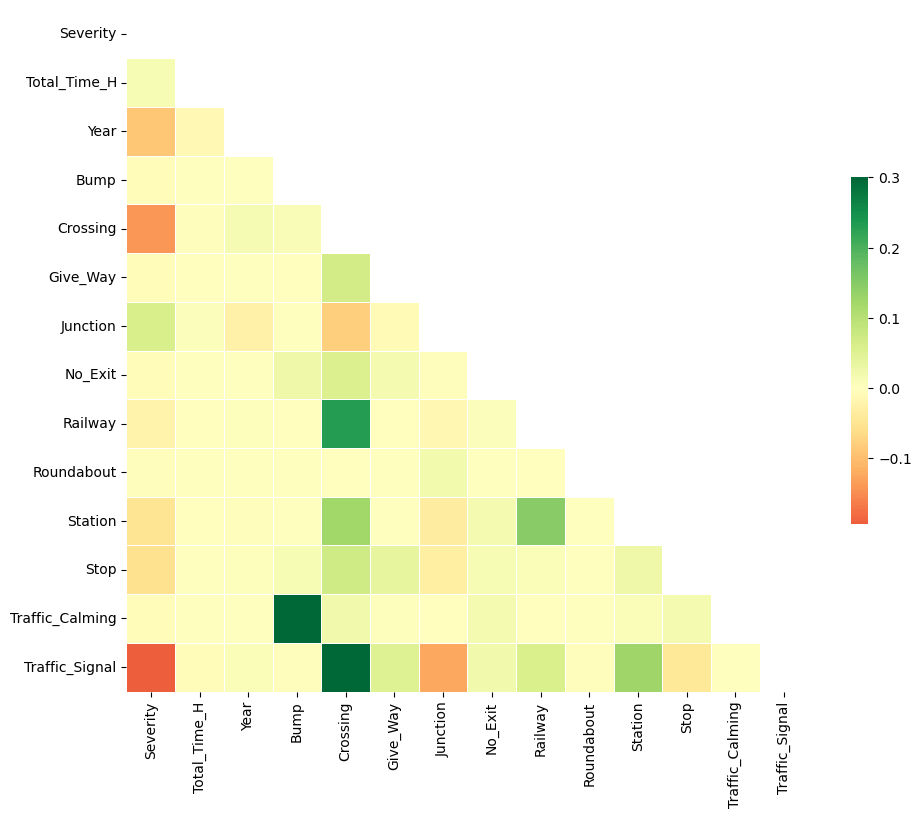

In [34]:
corr_obst = accidents_obst.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_obst, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_obst, mask=mask, vmax=.3, center=0, cmap='RdYlGn',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Exploratory analyses - duration of the accident

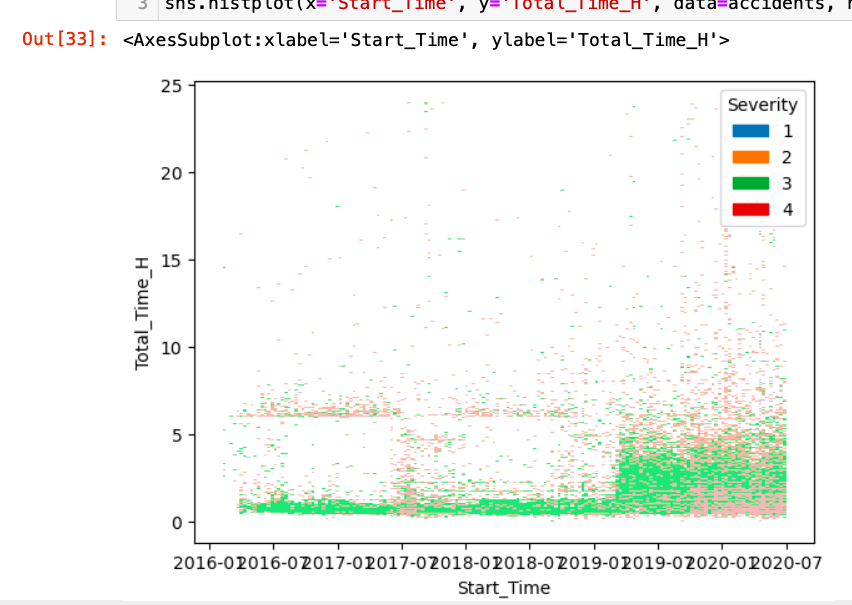

In [35]:
# sns.histplot(x='Start_Time', y='Total_Time_H', data=accidents, hue='Severity')

# Gebruik hier een schermafbeelding van de bovenstaande histplot functie!! 10 min.
from IPython.display import Image
Image("Schermafbeelding 2022-11-03 om 11.09.17.png")

Total time of the accident, on the y-axis, suddenly increased  around 2019. From a low average of 1 hours to 3-4 hours.

Could this be due to new regulations for solving traffic incidents and cleaning the road? Could this be due to new measurement methods?

#### Distribution of total_time_H

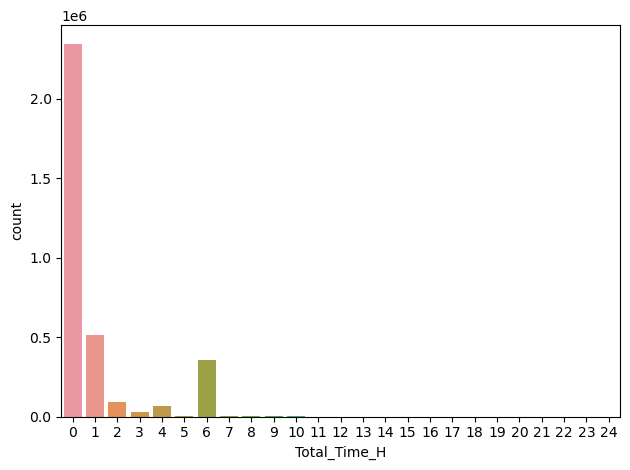

In [36]:
# What is the distribution of total_time_h?
total_t_less24 = accidents[accidents['Total_Time_H'] <= 24]

sns.countplot(data=total_t_less24, x='Total_Time_H')

plt.tight_layout()

#### Severity over time

In [37]:
# lineplot:
#    Start_Time op de x-as per dag.
#    Counts van accidents per severity klasse per dag

# Exploratory analyses: Number of accidents per [time]

### Number of accidents per year

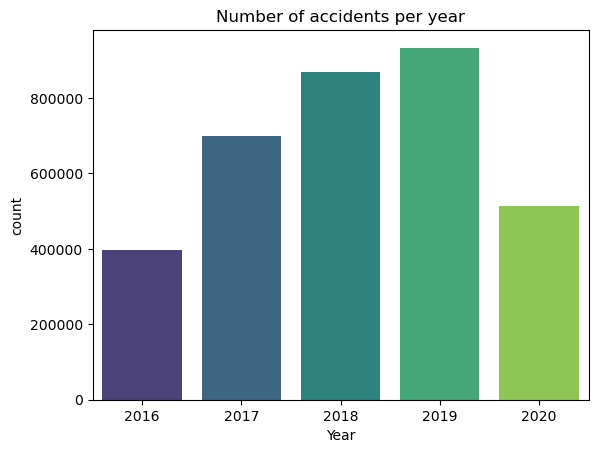

In [38]:
sns.countplot(data=accidents, x='Year', palette='viridis')

plt.title('Number of accidents per year')
plt.show()

### Number of accidents per season

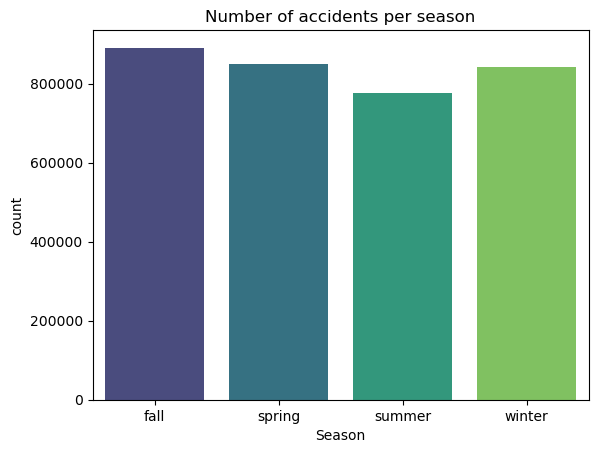

In [39]:
sns.countplot(data=accidents, x='Season', palette='viridis')

plt.title('Number of accidents per season')
plt.show()

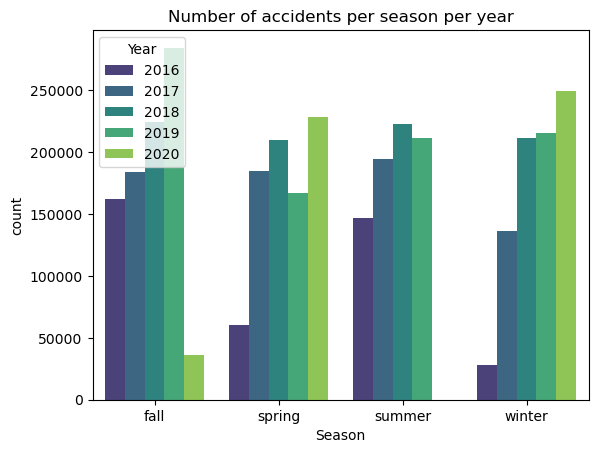

In [40]:
sns.countplot(data=accidents, x='Season', palette='viridis', hue='Year')

plt.title('Number of accidents per season per year')
plt.show()

### Number of accidents per month

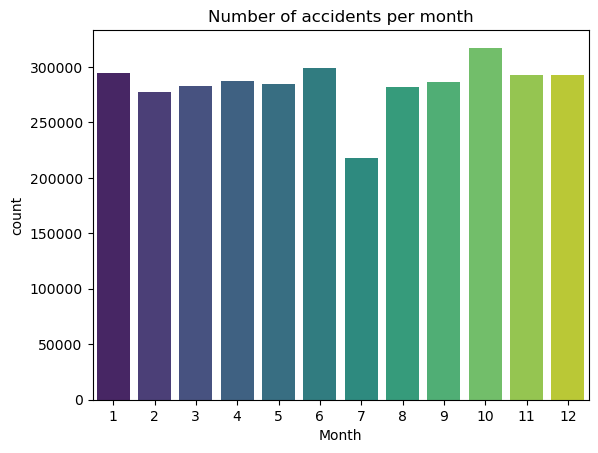

In [41]:
sns.countplot(data=accidents, x='Month', palette='viridis')

plt.title('Number of accidents per month')
plt.show()

In [42]:
#sns.countplot(data=accidents, x='Month', palette='viridis', hue='Year')

#plt.title('Number of accidents per month per year')
#plt.show()

### Number of accidents per day of the week

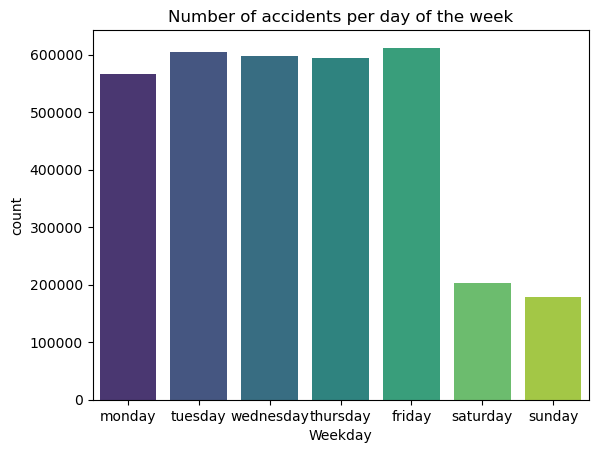

In [43]:
sns.countplot(data=accidents, x='Weekday', palette='viridis',
              order=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])

plt.title('Number of accidents per day of the week')
plt.show()

# Exploratory analyses - accidents per severity rating

## Total number of accidents per severity

In [44]:
# Create a table of counts of number of accidents per severity
n_accidents = accidents_obst['Severity'].value_counts().reset_index()
n_accidents = n_accidents.rename(columns={'index':'Severity', 'Severity':'count'})
n_accidents = n_accidents.sort_values(by='Severity')
n_accidents

,Severity,count
3,1,26589
0,2,2312863
1,3,973611
2,4,100513


In [45]:
# Create a table of counts of number of accidents per severity per year
n_accidents_year = accidents_obst[['Year', 'Severity']].value_counts().reset_index()
n_accidents_year = n_accidents_year.sort_values(by=['Year', 'Severity'])

# Turn it into a multiindex data frame
#n_accidents_year = n_accidents_year.set_index(keys=['Year', 'Severity'])

n_accidents_year.rename(columns={0:'Counts'}, inplace=True)


n_accidents_year = n_accidents_year.reset_index().drop('index', axis=1)
n_accidents_year

,Year,Severity,Counts
0,2016,1,223
1,2016,2,261529
2,2016,3,122259
3,2016,4,13071
4,2017,1,277
5,2017,2,451467
6,2017,3,225983
7,2017,4,21740
8,2018,1,253
9,2018,2,560909


From the table above, we can see that ......

In [46]:
# Sum of accidents per year:
sum_acc = n_accidents_year.groupby(by='Year').sum().drop(axis=1, labels='Severity')
# Repeat rows
sum_acc = sum_acc.loc[sum_acc.index.repeat(4)]
# Create a numeric index instead of 'year' as index.
sum_acc = sum_acc['Counts'].reset_index()



# Calculate percentage:
# df[percent] = (df['column_name'] / df['column_name'].sum()) * 100

percent = n_accidents_year['Counts'] / sum_acc['Counts'] * 100

In [47]:
n_accidents_year['Percent_peryear'] = percent
n_accidents_year

,Year,Severity,Counts,Percent_peryear
0,2016,1,223,0.056160
1,2016,2,261529,65.862719
2,2016,3,122259,30.789358
3,2016,4,13071,3.291763
4,2017,1,277,0.039602
5,2017,2,451467,64.544432
6,2017,3,225983,32.307886
7,2017,4,21740,3.108081
8,2018,1,253,0.029091
9,2018,2,560909,64.496022


#### Percentage of accidents per severity category per year
In other words: are there more accidents of a severity category in one year compared to other years? Does the distribution of severity categories change over time?

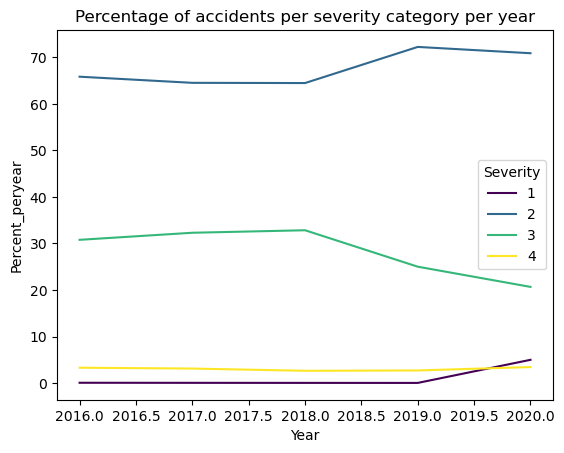

In [48]:
# VERANDER: ipv per jaar naar per maand per jaar??


# lineplot
sns.lineplot(data=n_accidents_year, x='Year', y='Percent_peryear', hue='Severity',
            palette='viridis')

plt.title('Percentage of accidents per severity category per year')

plt.show()

#### Total number of accidents per year per severity category

In [49]:
accidents_obst_2017to19 = accidents_obst[(accidents_obst['Year']==2017) |
                                      (accidents_obst['Year']==2018) |
                                      (accidents_obst['Year']==2019)]

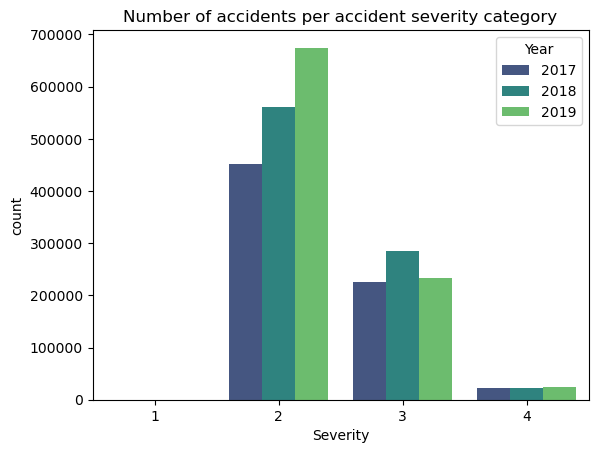

In [50]:
# Create a plot that shows the total number of accidents per severity in 2017, 2018, 2019 (so progress)
sns.countplot(data=accidents_obst_2017to19, x='Severity', palette='viridis', hue='Year')

#title 
plt.title('Number of accidents per accident severity category')
plt.show()

# Increasing number of accidents severity 2. Accidents severity 1 almost not visible (so few)

#### Number accidents per severity category, per season and year

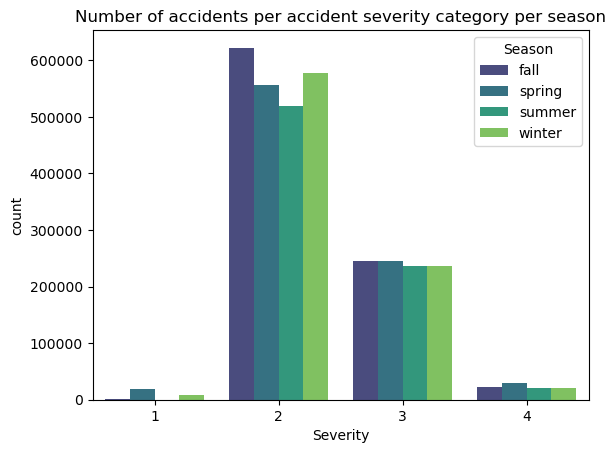

In [51]:
# plot counts of accidents, use season as hue
sns.countplot(data=accidents, x='Severity', palette='viridis', hue='Season')

plt.title('Number of accidents per accident severity category per season')
plt.show()

Niet meer heftige ongelukken in bijv. herfst en winter vergeleken met de andere seizoenen. We meer ongelukken met severity 2 in de herfst en winter (test correlatie?)

# Exploratory analyses - number of obstructions reported per accident

In [52]:
n_obst.value_counts()

0    2436626
1     750473
2     230254
3      34500
4       2572
5        118
6          2
dtype: int64

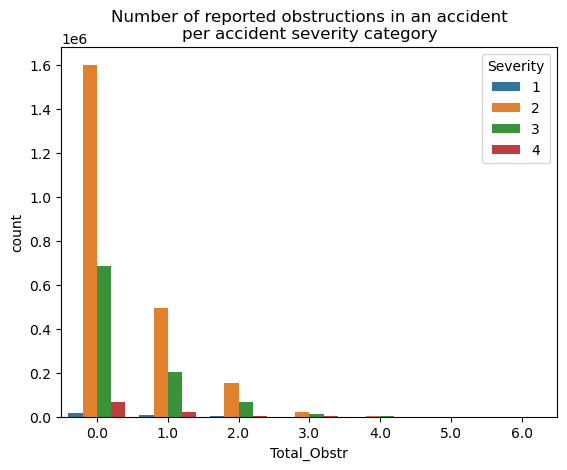

In [53]:
sns.countplot(data=accidents, x='Total_Obstr', hue='Severity')

plt.title('Number of reported obstructions in an accident\nper accident severity category')
plt.show()

As visible in the cell above, several accidents have multiple reported road obstructions near the site of the accident. 2.4 Million of accidents have no reported road obstructions.

# Exploratory analyses - per severity, count of road obstructions

Use the variable 'accidents_obst_17to19' so you can show the change over time. 

#### Bump

In [54]:
accidents_obst['Bump'].value_counts()

False    3412982
True         594
Name: Bump, dtype: int64

In [55]:
#sns.countplot(data=accidents_obst[accidents_obst['Bump']==True], x='Bump', palette='viridis', hue='Severity')

#plt.title('Number of bumps associated with an accident per severity category')

#plt.show()

In [56]:
#sns.countplot(data=accidents_obst_17to19, x='Total_Time_H', y='Bump', palette='viridis')

#title 
#plt.title('Number of bumps associated with an accident per severity category')

#plt.show()

#### Crossing

In [57]:
#sns.countplot(data=accidents_obst[accidents_obst['Crossing']==True], x='Crossing', palette='viridis', hue='Severity')

#plt.title('Number of crossings associated with an accident per severity category')

#plt.show()

#### Give way

In [58]:
#sns.barplot(data=accidents_obst, x='Give_Way', y='Severity', palette='viridis')

#plt.title("Number of 'give way' associated with an accident per severity category")

#plt.show()

#### Junction

In [59]:
#sns.barplot(data=accidents_obst, x='Junction', y='Severity', palette='viridis')

#plt.title('Number of junctions associated with an accident per severity category')

#plt.show()

####  no exit

In [60]:
accidents_obst['No_Exit'].value_counts()

False    3409289
True        4287
Name: No_Exit, dtype: int64

In [61]:
#sns.barplot(data=accidents_obst, x='No_Exit', y='Severity', palette='viridis')

#plt.title("Number of 'no exit' associated with an accident per severity category")

#plt.show()

#### railway

In [62]:
accidents_obst['Railway'].value_counts()

False    3383205
True       30371
Name: Railway, dtype: int64

In [63]:
#sns.barplot(data=accidents_obst, x='Railway', y='Severity', palette='viridis')

#plt.title('Number of railways associated with an accident per severity category')

#plt.show()

#### roudabout

In [64]:
#sns.barplot(data=accidents_obst, x='Roundabout', y='Severity', palette='viridis')

#plt.title('Number of roundabouts associated with an accident per severity category')

#plt.show()

#### station

In [65]:
#sns.barplot(data=accidents_obst, x='Station', y='Severity', palette='viridis')

#title 
#plt.title('Number of stations associated with an accident per severity category')

#plt.show()

#### stop

In [66]:
#sns.barplot(data=accidents_obst, x='Stop', y='Severity', palette='viridis')

#plt.title('Number of stop signs associated with an accident per severity category')

#plt.show()

#### traffic calming

In [67]:
#sns.barplot(data=accidents_obst, x='Traffic_Calming', y='Severity', palette='viridis')

#plt.title("Number of 'traffic calming' associated with an accident per severity category")

#plt.show()

#### traffic signal

In [68]:
#sns.barplot(data=accidents_obst, x='Traffic_Signal', y='Severity', palette='viridis')

#plt.title("Number of 'traffic signal' associated with an accident per severity category")

#plt.show()

## Sum of reported obstacles per severity rating

In [69]:
# Create a new dataframe (view) to do obstacles analyses with
# Do not include 'Turning_Loop' since this variable is False for every accident and thus cannot be analysed
accidents_obst = accidents[['ID', 'Severity', 'Start_Time', 'End_Time', 'Total_Time', 'Total_Time_H',
                            'Year', 'Weekday',
                            'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
                            'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']]

#### Table

In [70]:
# Create a table with the sum of each reported obstacle per severity rating.
obst_overview = accidents_obst.groupby(by='Severity').sum()
# Reset the index to a numeric index.
obst_overview = obst_overview.reset_index()
obst_overview.drop(['Total_Time_H', 'Year'], axis=1, inplace=True)
obst_overview

,Severity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,1,9,8175,62,2279,96,514,1,908,444,11,11402
1,2,499,235749,7137,158376,3230,24024,176,57667,46403,1158,526428
2,3,81,18771,1744,102245,852,5143,2,8331,2441,178,57964
3,4,5,4692,326,11432,109,690,3,1411,1302,31,9818


In [71]:
# Create a table with the sum of each reported obstacle per severity rating.
obst_overview = accidents_obst.groupby(by='Severity').sum()
# Transpose the table: rows become columns.
obst_overview = obst_overview.transpose()
# Reset the index to a numeric index.
obst_overview = obst_overview.reset_index()

# Drop the rows with time and date information.
obst_overview.drop([0, 1, 2], axis=0, inplace=True)

In [72]:
# Change the format of the dataframe.
obst_overview_melt = pd.melt(obst_overview, id_vars="index", var_name="Severity", value_name="counts")

#### Graph

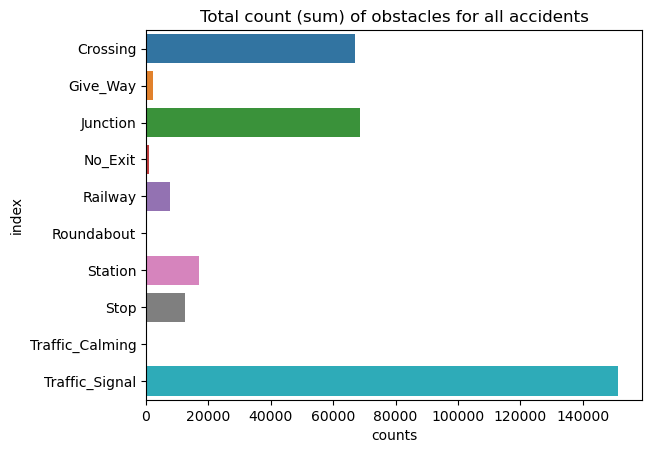

In [73]:
plot = sns.barplot(data=obst_overview_melt, y='index', x='counts', errorbar=None)

plt.title('Total count (sum) of obstacles for all accidents')
plt.show()

# Traffic signals, junctions, and crossings are the most reported obstacles in accidents

In [74]:
#obst_overview_melt_12 = obst_overview_melt[(obst_overview_melt['Severity'] == 1) | 
#                                          (obst_overview_melt['Severity'] == 2)]

#plot = sns.barplot(data=obst_overview_melt_12, y='index', x='counts', errorbar=None)

#plt.title('Total count of obstacles for accidents of severity rating 1 or 2')
#plt.show()

# Traffic signals, junctions, and crossings are the most reported obstacles in accidents
# also those with severity rating 1 or 2

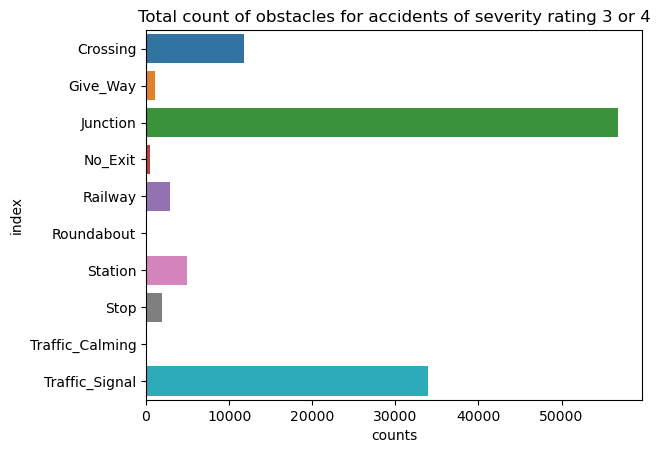

In [75]:
obst_overview_melt_34 = obst_overview_melt[(obst_overview_melt['Severity'] == 3) | 
                                          (obst_overview_melt['Severity'] == 4)]

plot = sns.barplot(data=obst_overview_melt_34, y='index', x='counts', errorbar=None)

plt.title('Total count of obstacles for accidents of severity rating 3 or 4')
plt.show()

# Traffic signals, junctions, and crossings are the most reported obstacles in accidents
# also those with severity rating 3 or 4

#One figure, 4 graphs of obstacles, one per severity. 
obst_sev1 = obst_overview_melt[obst_overview_melt['Severity']==1]
obst_sev2 = obst_overview_melt[obst_overview_melt['Severity']==2]
obst_sev3 = obst_overview_melt[obst_overview_melt['Severity']==3]
obst_sev4 = obst_overview_melt[obst_overview_melt['Severity']==4]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(15,15))

ax1.bar('index', 'counts', data=obst_sev1)
ax2.bar('index', 'counts', data=obst_sev2)
ax3.bar('index', 'counts', data=obst_sev3)
ax4.bar('index', 'counts', data=obst_sev4)

ax1.set_title('Severity 1')
ax2.set_title('Severity 2')
ax3.set_title('Severity 3')
ax4.set_title('Severity 4')

#Give them all the same x-axis...
ax1.set_ylim(bottom=0, top=550000)
ax2.set_ylim(bottom=0, top=550000)
ax3.set_ylim(bottom=0, top=550000)
ax4.set_ylim(bottom=0, top=550000)

plt.tight_layout()
plt.show()

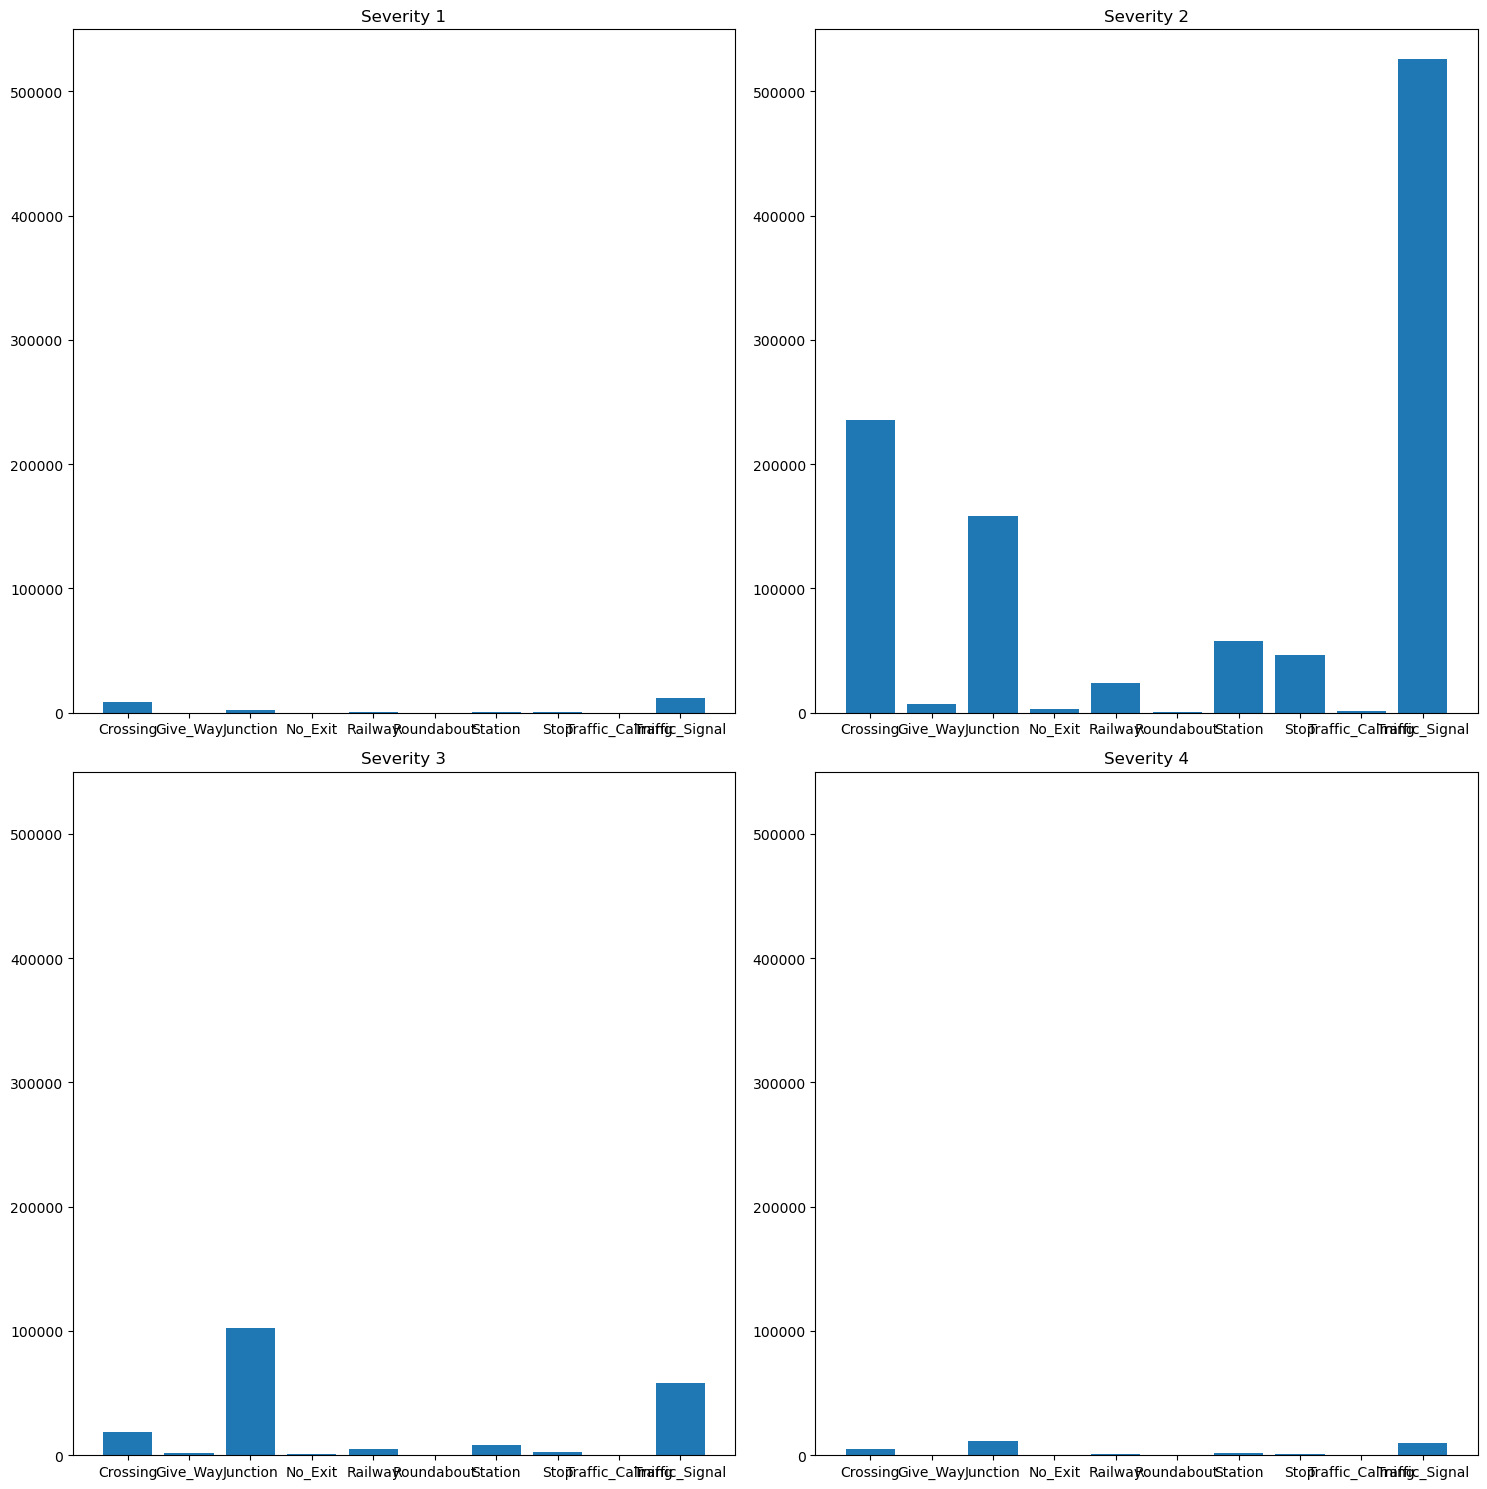

In [76]:
# One figure, 4 graphs of obstacles, one per severity. 
obst_sev1 = obst_overview_melt[obst_overview_melt['Severity']==1]
obst_sev2 = obst_overview_melt[obst_overview_melt['Severity']==2]
obst_sev3 = obst_overview_melt[obst_overview_melt['Severity']==3]
obst_sev4 = obst_overview_melt[obst_overview_melt['Severity']==4]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

axs[0,0].bar('index', 'counts', data=obst_sev1)
axs[0,1].bar('index', 'counts', data=obst_sev2)
axs[1,0].bar('index', 'counts', data=obst_sev3)
axs[1,1].bar('index', 'counts', data=obst_sev4)

axs[0,0].set_title('Severity 1')
axs[0,1].set_title('Severity 2')
axs[1,0].set_title('Severity 3')
axs[1,1].set_title('Severity 4')

# Give them all the same x-axis...
axs[0,0].set_ylim(bottom=0, top=550000)
axs[0,1].set_ylim(bottom=0, top=550000)
axs[1,0].set_ylim(bottom=0, top=550000)
axs[1,1].set_ylim(bottom=0, top=550000)

plt.tight_layout()
plt.show()

#### Number of reported obstructions (per type) per severity

In [77]:
#sns.barplot(data=obst_overview, x=0, y='index')
#plt.title('Number of reported obstructions for severity 1')
#plt.show()

In [78]:
#sns.barplot(data=obst_overview, x=1, y='index')
#plt.title('Number of reported obstructions for severity 2')
#plt.show()

In [79]:
#sns.barplot(data=obst_overview, x=2, y='index')
#plt.title('Number of reported obstructions for severity 3')
#plt.show()

In [80]:
#sns.barplot(data=obst_overview, x=3, y='index')
#plt.title('Number of reported obstructions for severity 4')
#plt.show()

# Exploratory analyses - top 5 obstructions
Explore the 5 largest categories: traffic signals, crossings, junctions, stations, and stops. Aggregate the rest in a column 'other'.

- [X] percentual contribution to severity
- [X] changes in contribution of the top 5 over time? (e.g. less accidents associated with traffic_signals in 2020 than 2017?)

## Percentual contribution to severity

In [81]:
# Create a table with the sum of each reported obstacle per severity rating.
obst_overview = accidents_obst.groupby(by='Severity').sum()
# Reset the index to a numeric index.
obst_overview = obst_overview.reset_index()
obst_overview.drop(['Total_Time_H', 'Year'], axis=1, inplace=True)

In [82]:
# Create the variable and column 'Other'
other = (obst_overview['Bump'] + obst_overview['Give_Way'] + obst_overview['No_Exit'] +
        obst_overview['Railway'] + obst_overview['Roundabout'] +
        obst_overview['Traffic_Calming'])

obst_overview['Other'] = other

# Drop the columns summed in 'other'
obst_overview.drop(labels=['Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout',
                          'Traffic_Calming'], axis=1, inplace=True)
obst_overview

,Severity,Crossing,Junction,Station,Stop,Traffic_Signal,Other
0,1,8175,2279,908,444,11402,693
1,2,235749,158376,57667,46403,526428,36224
2,3,18771,102245,8331,2441,57964,8000
3,4,4692,11432,1411,1302,9818,1164


In [83]:
# Sum of reported obstructions per severity
sum_obst = (obst_overview['Crossing'] + obst_overview['Junction'] +
            obst_overview['Station'] + obst_overview['Stop'] + 
            obst_overview['Traffic_Signal'] + obst_overview['Other'])

# Calculate percentage:
obst_overview['Crossing'] = obst_overview['Crossing'] / sum_obst * 100
obst_overview['Junction'] = obst_overview['Junction'] / sum_obst * 100
obst_overview['Station'] = obst_overview['Station'] / sum_obst * 100
obst_overview['Stop'] = obst_overview['Stop'] / sum_obst * 100
obst_overview['Traffic_Signal'] = obst_overview['Traffic_Signal'] / sum_obst * 100
obst_overview['Other'] = obst_overview['Other'] / sum_obst * 100

obst_overview = obst_overview.set_index('Severity')
obst_overview

,Crossing,Junction,Station,Stop,Traffic_Signal,Other
Severity,,,,,,
1,34.203590,9.535166,3.799004,1.857663,47.705117,2.899460
2,22.222714,14.929203,5.435939,4.374146,49.623367,3.414630
3,9.492192,51.703649,4.212852,1.234374,29.311461,4.045471
4,15.734934,38.337972,4.731882,4.366344,32.925316,3.903551


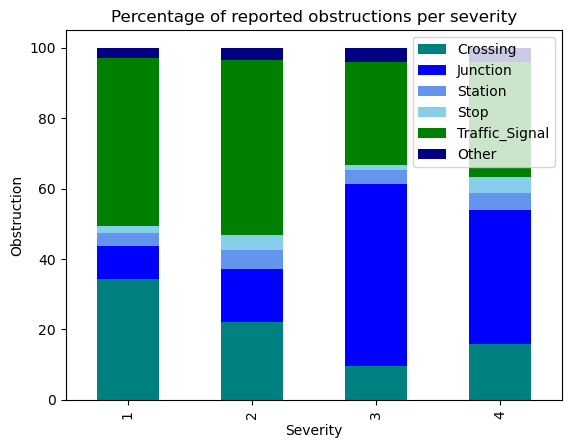

In [84]:
# create stacked bar chart for percentages
obst_overview.plot(kind='bar', stacked=True, color=['teal', 'blue', 'cornflowerblue',
                                                    'skyblue', 'green', 'navy'])

# labels for x & y axis
plt.xlabel('Severity')
plt.ylabel('Obstruction')
 
# title of plot
plt.title('Percentage of reported obstructions per severity')
plt.show()

## Changes in percentual contribution over time

In [85]:
# Create a new dataframe (view) to do obstacles analyses with
accidents_obst = accidents[['ID', 'Severity', 'Start_Time', 'End_Time', 'Total_Time', 'Total_Time_H',
                            'Month', 'Year', 'Weekday',
                            'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
                            'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']]

In [86]:
# Create a table of counts of number of accidents per month per year
n_acc_per_month_year = accidents_obst.groupby(by=['Year', 'Month']).size()

In [87]:
# calculate the sum of the top 5 traffic obstructions and 'other' per month and year


# traffic signals, crossings, junctions, stations, and stops. Aggregate the rest in
# a column 'other'.

# n_acc_per_month_year --> dataframe of counts of number of accidents per month per year


my_list=['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
         'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
list_series = []


def to_percentage(my_list):
    for item in my_list:
        # calculate the sum of given series in my_list, grouped by year and month ('my').
        # e.g. the sum of all accidents with associated bum, per year and month.
        var_per_my = accidents_obst.groupby(by=['Year', 'Month'])[item].sum()
        
        # calculate the percentage of the new sum variable to total accidents
        # that happened that month and year('my').
        var_percentage_per_my = (var_per_my / n_acc_per_month_year) * 100
        
        # save it in a list.
        list_series.append(var_percentage_per_my)
        
        
to_percentage(my_list)

# turn the list of series produced with the function into a dataframe
df = pd.DataFrame(list_series)

# rename the row labels so that they're actually descriptive of the type of obstacle. 
df = df.rename({0:'Bump', 1:'Crossing', 2:'Give_Way', 3:'Stop', 4:'Traffic_Signal',
                3:'Junction', 4:'No_Exit', 5:'Railway', 6:'Roundabout',
                7:'Station', 8:'Stop', 9:'Traffic_Calming', 10:'Traffic_Signal'})


# transpose dateframe, years and months as rows and obstacles as columns
df = df.transpose()

# create an extra column of the sum of all obstactles that are not top-5 obstacles
# drop all the columns columnsthat are not top-5 obstacles
other = (df['Bump'] + df['Give_Way'] + df['No_Exit'] + df['Railway'] +
         df['Roundabout'] + df['Traffic_Calming'])

df['Other'] = other

df = df.drop(['Bump', 'Give_Way', 'No_Exit', 'Railway',
              'Roundabout', 'Traffic_Calming', ], axis=1)

# create an extra row for all accidents with no reported obstacle
no_obst = 100 - (df['Crossing'] + df['Junction'] + df['Station'] +
                 df['Stop'] + df['Traffic_Signal'] + df['Other'])

df['No_Obst'] = no_obst

# show dataframe
df.head()

Crossing   Junction   Station      Stop  Traffic_Signal     Other  \
Year Month                                                                      
2016 1           NaN        NaN       NaN       NaN             NaN       NaN   
     2      3.309204   7.032058  0.723888  0.620476        9.617373  0.413650   
     3      4.195346   8.439856  2.146837  1.409374        9.701737  1.327434   
     4      4.444826  11.195012  1.819118  1.573137        9.759167  1.201304   
     5      4.265037  14.972120  1.963459  1.749911        9.669000  1.340610   

              No_Obst  
Year Month             
2016 1            NaN  
     2      78.283351  
     3      72.779417  
     4      70.007437  
     5      66.039862

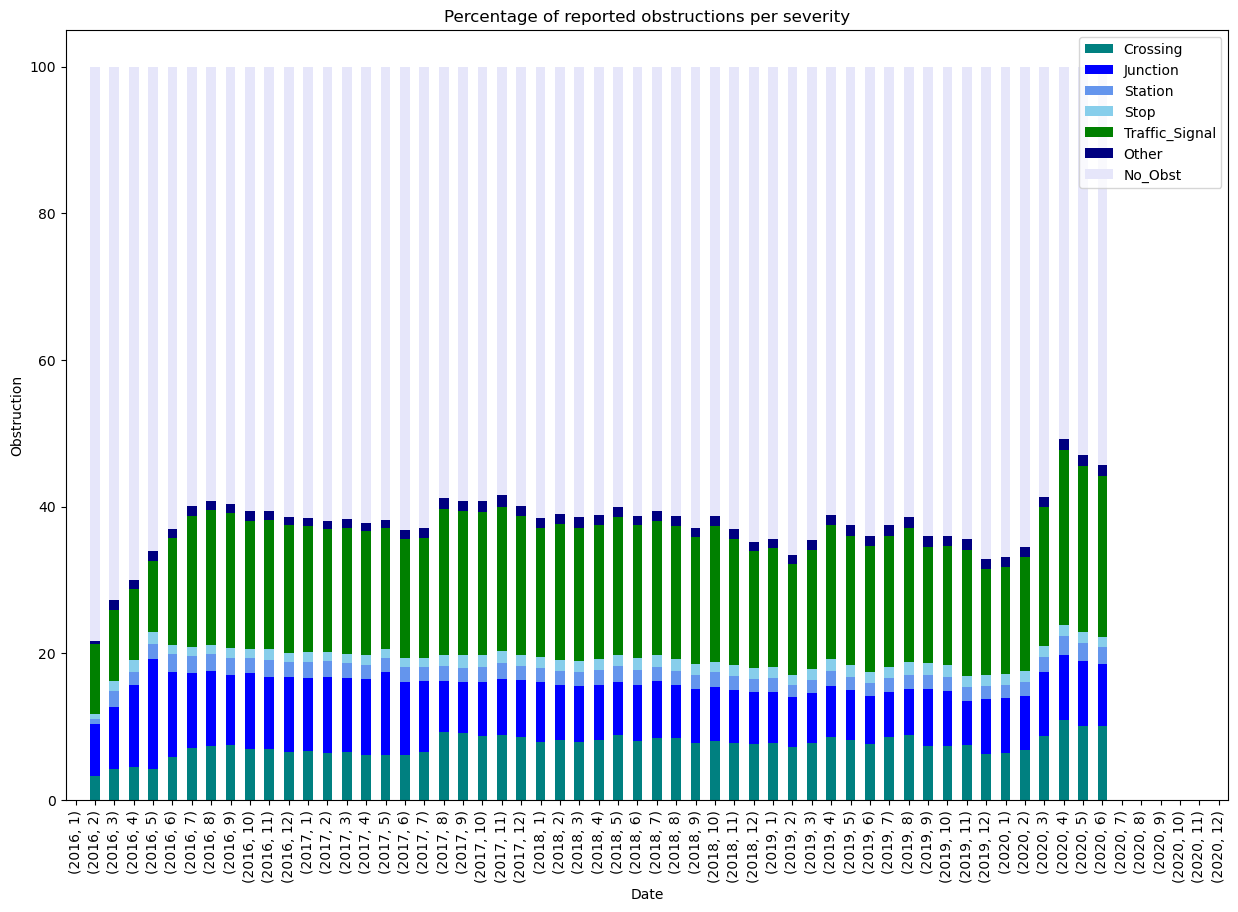

In [88]:
# Stacked bar chart. Bij nader inzien is dit niet heel overzichtelijk.
# Line chart in de cell hieronder is overzichtelijker

# create stacked bar chart for percentages
df.plot(kind='bar', stacked=True, figsize=(15,10),
        color=['teal', 'blue', 'cornflowerblue', 'skyblue', 'green', 'navy', 'lavender'])

# labels for x & y axis
plt.xlabel('Date')
plt.ylabel('Obstruction')
 
# title of plot
plt.title('Percentage of reported obstructions per severity')
plt.show()

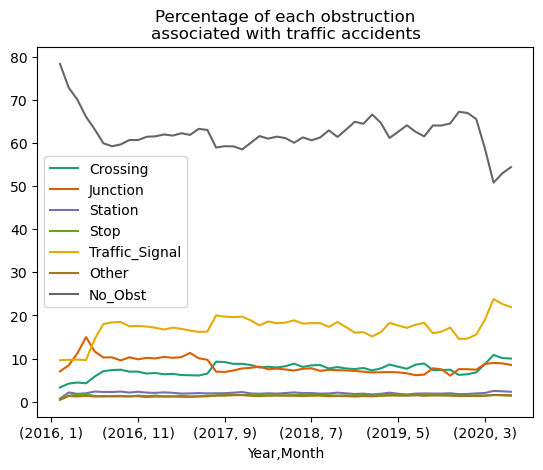

In [89]:
df.plot(colormap='Dark2')

plt.title('Percentage of each obstruction\nassociated with traffic accidents')
plt.show()

# Exploratory analyses - sunlight

In [90]:
# Create a new dataframe (view) to do time/light analyses with
accidents_light = accidents[['ID', 'Severity', 'Start_Time', 'End_Time', 'Total_Time', 'Total_Time_H',
                            'Year', 'Weekday', 'Season', 'Sunrise_Sunset',
                            'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']]

In [91]:
# 'Sunrise_Sunset'
#    Day      2533377
#    Night     880090

# 'Civil_Twilight'
#    Day      2703077
#    Night     710390

# 'Nautical_Twilight'
#    Day      2873695
#    Night     539772

# 'Astronomical_Twilight'
#    Day      3000736
#    Night     412731

# When using the Sunrise_Sunset variable, the drivers will have the most visibility (less instances of 'Day'
# means that this variable uses a stricter cut-off. Also correct according to internet sources.) Therefore,
# the Sunrise_Sunset variable will be used for analyses

accidents['Light'].value_counts()
accidents['Light'].unique()

array(['Night', 'Twilight', 'Day', nan], dtype=object)

In [92]:
accidents['Light'].describe()

# 3413467 entries vs 3513615 rows in the dataframe, so 103.148 rows of missing data (3% of the dataset).

count     3413467
unique          3
top           Day
freq      2533377
Name: Light, dtype: object

#### number of accidents during day and night per year

In [93]:
# Count of the number of accidents during day and night and twilight
sum_accidents = accidents['ID'].count()
count_accidents_light = accidents.groupby(by='Light')['ID'].count()
count_accidents_light = pd.DataFrame(count_accidents_light)

# Calculate the percentage of accidents per light-status
perc_accidents_light = count_accidents_light / sum_accidents * 100

# Create a new colun showing the percentage
count_accidents_light['Percentage'] = perc_accidents_light
count_accidents_light = count_accidents_light.rename({'ID':'Counts'}, axis=1)
count_accidents_light

,Counts,Percentage
Light,,
Day,2533377,74.214753
Night,409282,11.989831
Twilight,470808,13.792223


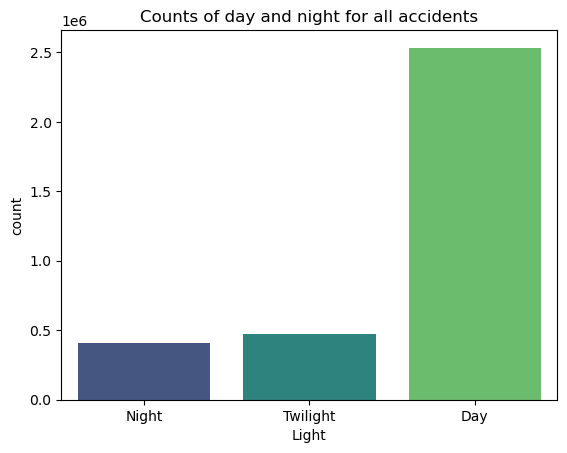

In [94]:
sns.countplot(data=accidents, x='Light', palette='viridis')

plt.title('Counts of day and night for all accidents')

plt.show()

Most accidents happen during the day (74%). Not surprising, as more people will be driving during the day compared to during the night. 

#### Change in number of accidents from 2017 to 2019

In [95]:
accidents_light_2017to19 = accidents[(accidents['Year']==2017) |
                                     (accidents['Year']==2018) |
                                     (accidents['Year']==2019)]

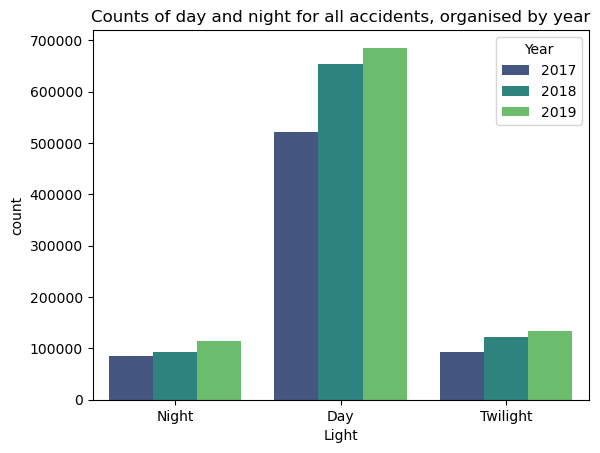

In [96]:
sns.countplot(data=accidents_light_2017to19, x='Light', palette='viridis', hue='Year')

plt.title('Counts of day and night for all accidents, organised by year')
plt.show()

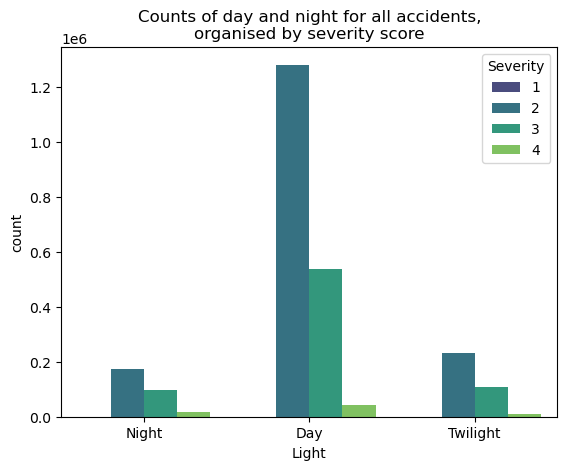

In [97]:
sns.countplot(data=accidents_light_2017to19, x='Light', palette='viridis', hue='Severity')

plt.title('Counts of day and night for all accidents,\norganised by severity score')
plt.show()

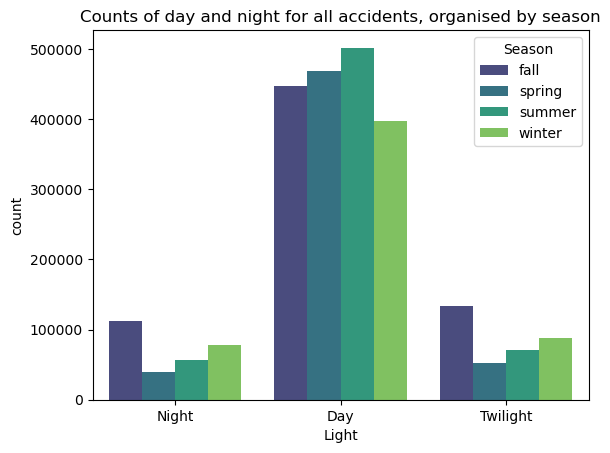

In [98]:
sns.countplot(data=accidents_light_2017to19, x='Light', palette='viridis', hue='Season')

plt.title('Counts of day and night for all accidents, organised by season')
plt.show()

#### Total number of accidents per hour of the day

In [99]:
accidents_light = accidents[['Hour', 'Month', 'Light']]
accidents_light = accidents_light.sort_values(by=['Month', 'Hour'])

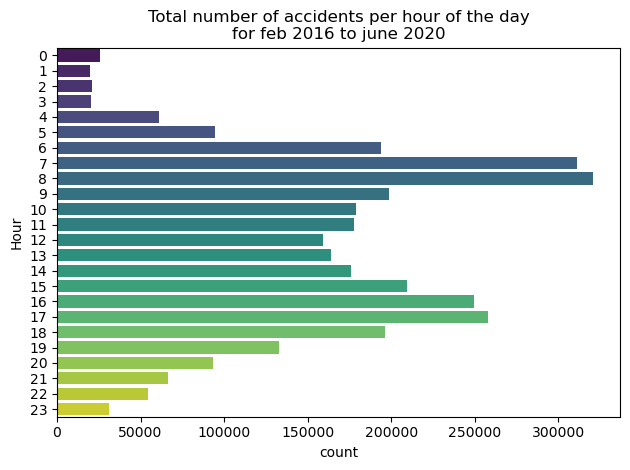

In [100]:
sns.countplot(data=accidents_light, y='Hour', palette='viridis')

plt.title('Total number of accidents per hour of the day\nfor feb 2016 to june 2020')
plt.tight_layout()
plt.show()

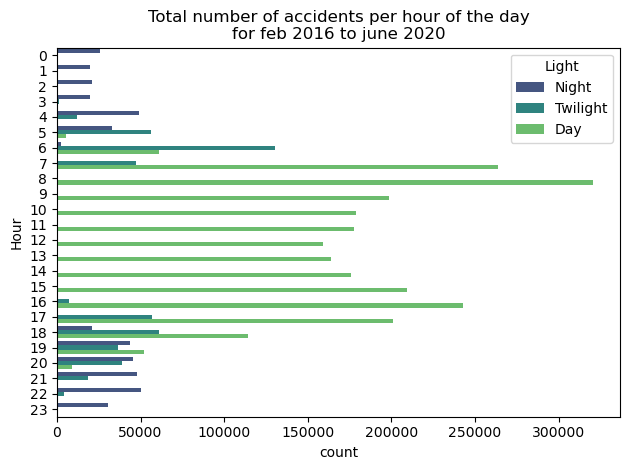

In [101]:
sns.countplot(data=accidents_light, y='Hour', palette='viridis', hue='Light')

plt.title('Total number of accidents per hour of the day\nfor feb 2016 to june 2020')
plt.tight_layout()
plt.show()

In [102]:
# per season, the hours of the day that are counted as 'day'

In [103]:
# per seizoen
# daylight savings (excl Arizona)

In [104]:
jan = accidents_light[accidents_light['Month']==1]

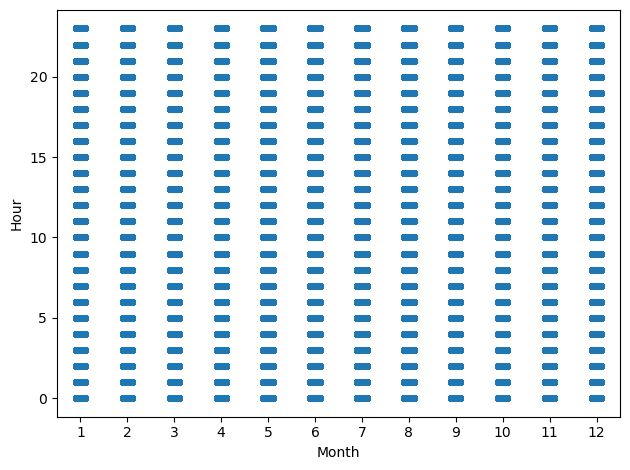

In [105]:
# vertical scatterplot: time on x-axis, month on y-axis, count of accidents as scatter dots

sns.stripplot(data=accidents_light, x='Month', y='Hour')
#sns.stripplot(data=jan, x='Month', y='Hour')

plt.tight_layout()
plt.show()

In [106]:
#per month, show when 'Light' becomes night --> twilight --> day

#per hour, count of 'day', 'night', 'twilight'. Which one is counted more

sept_2016 = accidents[(accidents['Month']==9) & (accidents['Year']==2016)]

sept_2016_counts = sept_2016.groupby(by='Hour')['Light'].value_counts()
sept_2016_counts

Hour  Light   
0     Night        346
1     Night        355
2     Night        327
3     Night        356
4     Night        626
      Twilight      19
5     Twilight     690
      Night        404
6     Twilight    1791
      Day          497
      Night          8
7     Day         3410
      Twilight     386
8     Day         4368
9     Day         4161
10    Day         3455
11    Day         3405
12    Day         2854
13    Day         2441
14    Day         2745
15    Day         2971
16    Day         3394
17    Day         3552
18    Day         2945
      Twilight     114
19    Twilight    1651
      Day          700
      Night          6
20    Twilight    1371
      Night        755
      Day            2
21    Night       1311
      Twilight      45
22    Night       1015
23    Night        510
Name: Light, dtype: int64

In [107]:
# longitude
# max - 67.113167
# min -124.623833

# Per state: number of obstructions and accidents

Enter a state (two letters):CA
   Severity  Crossing  Junction  Station   Stop  Traffic_Signal  Other
0         1       343      1168       71    189             542    101
1         2     21854     73252    11685  13197           55256   7001
2         3      2668     30402     3510    658            7249   3298
3         4       274      1130      153    182             689     77


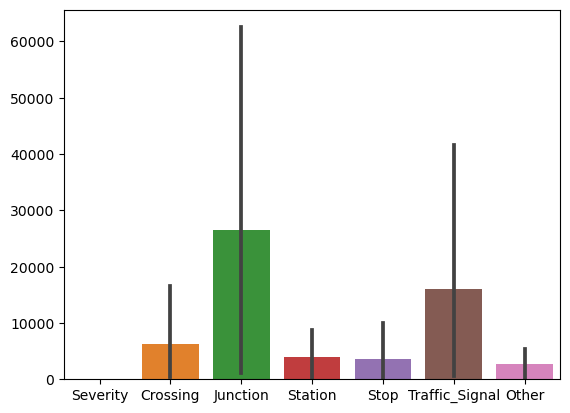

In [108]:
# Dashboard
state = input("Enter a state (two letters):")

def state_obstructions(state_name):
    df = accidents[accidents['State']== state_name ]
    df_obstructions = df[['Severity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
                          'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']]
    
    
    # Create a table with the sum of each reported obstacle per severity rating.
    obst_overview = df_obstructions.groupby(by='Severity').sum()
    # Reset the index to a numeric index.
    obst_overview = obst_overview.reset_index()

    # Create the variable and column 'Other'
    other = (obst_overview['Bump'] + obst_overview['Give_Way'] + obst_overview['No_Exit'] +
        obst_overview['Railway'] + obst_overview['Roundabout'] +
        obst_overview['Traffic_Calming'])

    obst_overview['Other'] = other
    
    # Drop the columns summed in 'other'
    obst_overview.drop(labels=['Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout',
                               'Traffic_Calming'], axis=1, inplace=True)
    
    print(obst_overview)
    
    sns.barplot(data=obst_overview)

    # maak dit van percentages? ook kolom zonder obstructions?
    # list(accidents['State'].unique())
    
state_obstructions(state)

AL: Alabama, traffic signal\
AZ: Arizona, crossing en traffic signal\
AR: Arkansas: junction (maar weinig, 75 totaal oid)